In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import theano
import theano.tensor as T
import cPickle as pickle
import os
load_path = '../../final_saved/boston/full'
data_path = '../../../data/boston'
!ls ../../final_saved/boston/full/

1e-05_100000.0.pckl  2.5e-05_100000.0.pckl  5e-05_100000.0.pckl
1e-05_1000.0.pckl    2.5e-05_1000.0.pckl    5e-05_1000.0.pckl
1e-05_10.0.pckl      2.5e-05_10.0.pckl	    5e-05_10.0.pckl
1e-05_1e+07.pckl     2.5e-05_1e+07.pckl     5e-05_1e+07.pckl
1e-05_1e+09.pckl     2.5e-05_1e+09.pckl     5e-05_1e+09.pckl
1e-06_100000.0.pckl  2.5e-06_100000.0.pckl  5e-06_100000.0.pckl
1e-06_1000.0.pckl    2.5e-06_1000.0.pckl    5e-06_1000.0.pckl
1e-06_10.0.pckl      2.5e-06_10.0.pckl	    5e-06_10.0.pckl
1e-06_1e+07.pckl     2.5e-06_1e+07.pckl     5e-06_1e+07.pckl
1e-06_1e+09.pckl     2.5e-06_1e+09.pckl     5e-06_1e+09.pckl


0
50
100
150
200
250


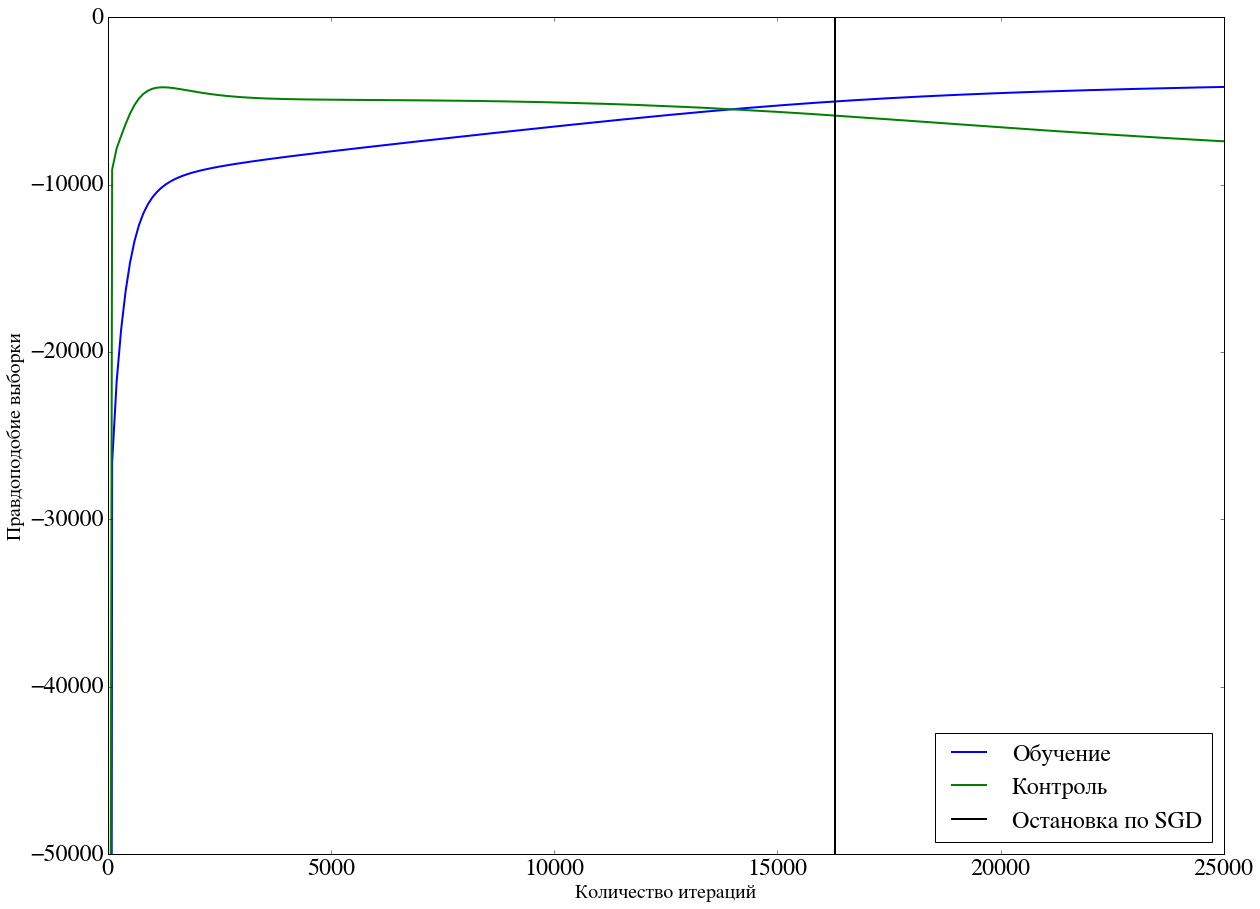

In [9]:
test_x = np.load(os.path.join(data_path, 'test_x.npy')).astype(np.float32)
test_y = np.load(os.path.join(data_path, 'test_y.npy')).astype(np.float32)

train_x = np.load(os.path.join(data_path, 'train_x.npy')).astype(np.float32)
train_y = np.load(os.path.join(data_path, 'train_y.npy')).astype(np.float32)

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path,'1e-06_10.0.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden =T.log(1 + T.exp(T.dot(X, W1)+b1))
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
results_train = []
results_test = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        p = np.array(p)
        result_train.append( monitor(train_x, train_y, p.astype(np.float32)))
        result_test.append(monitor(test_x, test_y, p.astype(np.float32)))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)
results_train= np.array(results_train)
results_test= np.array(results_test)
plt.plot(range(0, 251*100, 100), -results_train, label=u'Обучение')
plt.plot(range(0, 251*100, 100),-results_test, label = u'Контроль')
plt.plot((16300, 16300 ), (0, -50000), 'k-', label=u'Остановка по SGD')
plt.ylim((-50000,0))
plt.xlabel(u'Количество итераций', fontsize=20)
plt.ylabel(u'Правдоподобие выборки', fontsize=20)
plt.legend(loc='best')
#results_validation = np.array(results_validation)
#results_validation = (results_validation-np.min(results_validation))/(np.max(results_validation) - np.min(results_validation))
#print results_validation
#results_validation = results_validation*np.mean([result_test, result_train])
#plt.plot(results_validation)
#plt.xlim((1,len(results_validation)))

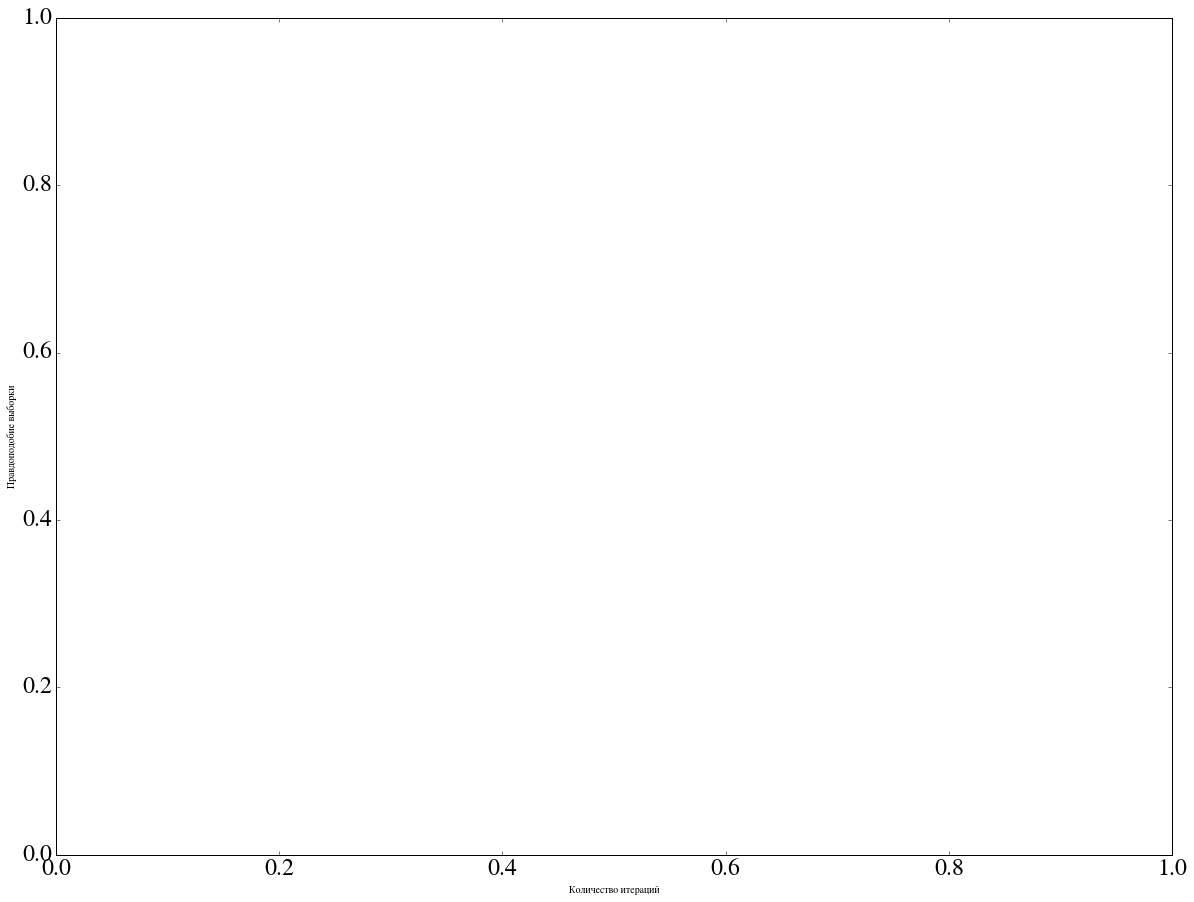

In [8]:
from plot_style import init_rc_params
init_rc_params()
plt.xlabel(u'Количество итераций')
plt.ylabel(u'Правдоподобие выборки')
plt.legend(loc='best')

(-50000, 0)

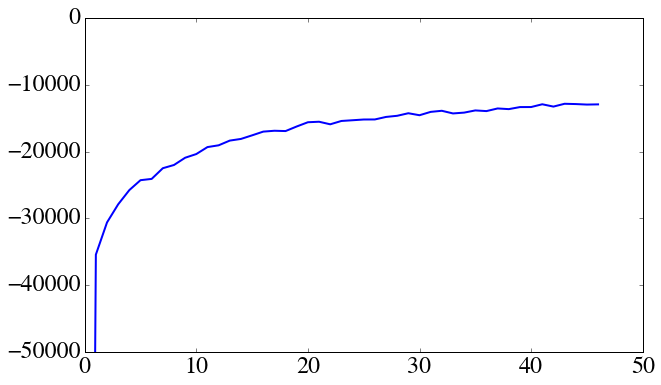

In [49]:
plt.plot(results_validation)
plt.ylim((-50000,0))
#163, 250